# Env

In [1]:
import argparse
import random

import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# 환경 설정
args = {
    # random seed value
    "seed": 1234,
    # CPU 또는 GPU 사용여부 결정
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu")
}
args = argparse.Namespace(**args)

print(args)

Namespace(device=device(type='cpu'), seed=1234)


In [3]:
# random seed 설정
random.seed(args.seed)
np.random.seed(args.seed)
torch.manual_seed(args.seed)
torch.cuda.manual_seed_all(args.seed)

# Negative Log Likelihood

In [19]:
# Generate linearly spaced vector
x = np.linspace(150, 190, 100)
print(x)

[150.         150.4040404  150.80808081 151.21212121 151.61616162
 152.02020202 152.42424242 152.82828283 153.23232323 153.63636364
 154.04040404 154.44444444 154.84848485 155.25252525 155.65656566
 156.06060606 156.46464646 156.86868687 157.27272727 157.67676768
 158.08080808 158.48484848 158.88888889 159.29292929 159.6969697
 160.1010101  160.50505051 160.90909091 161.31313131 161.71717172
 162.12121212 162.52525253 162.92929293 163.33333333 163.73737374
 164.14141414 164.54545455 164.94949495 165.35353535 165.75757576
 166.16161616 166.56565657 166.96969697 167.37373737 167.77777778
 168.18181818 168.58585859 168.98989899 169.39393939 169.7979798
 170.2020202  170.60606061 171.01010101 171.41414141 171.81818182
 172.22222222 172.62626263 173.03030303 173.43434343 173.83838384
 174.24242424 174.64646465 175.05050505 175.45454545 175.85858586
 176.26262626 176.66666667 177.07070707 177.47474747 177.87878788
 178.28282828 178.68686869 179.09090909 179.49494949 179.8989899
 180.3030303 

$P(x)={1 \over \sqrt{2 \pi \sigma^2}}e^{-{(x-\mu)^2 \over 2 \sigma^2}}$

In [6]:
def gaussian_pdf(x, mean=0, std=1):
    """
    Gaussian PDF(Probability Density Function)
    :param x: 입력 값
    :return: gelu activation result
    """
    var = std * std
    p = 1 / np.sqrt(np.pi * var) * np.exp(-np.square(x - mean) / (2 * var))
    return p

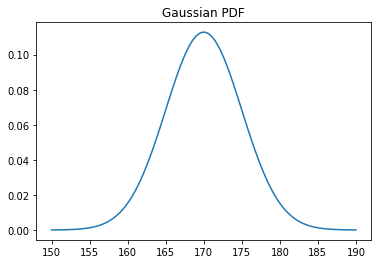

In [7]:
# gaussian PDF
y = gaussian_pdf(x, mean=170, std=5)

# draw plot
plt.plot(x, y)
plt.title('Gaussian PDF')
plt.show()

In [8]:
# sampled height
heights = [164.95, 165.35, 165.76, 166.16, 167.78, 168.99, 169.8, 170.2, 171.82, 172.63]
heights = np.array(heights)

In [9]:
# Likelihood
lh = gaussian_pdf(heights, mean=170, std=5)

print(lh)
print(np.prod(lh))

[0.06775528 0.07322248 0.07875962 0.08401879 0.10224628 0.11055912
 0.11274768 0.11274768 0.10560486 0.09825974]
4.895358294629109e-11


In [10]:
# mean value
means = np.arange(160, 181)
print(means)

[160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180]


In [13]:
# 평균값별로 likelihood 계산
lhs = []
for mean in means:
    lh = gaussian_pdf(heights, mean=mean, std=5)
    lh = np.prod(lh)
    lhs.append(lh)
lhs = np.array(lhs)
max_idx = np.argmax(lhs)

print(max_idx, means[max_idx], lhs[max_idx])
print(lhs)

8 168 8.273746830289748e-11
[7.59733879e-17 1.75107142e-15 2.70538099e-14 2.80178764e-13
 1.94502059e-12 9.05097568e-12 2.82324652e-11 5.90315804e-11
 8.27374683e-11 7.77324314e-11 4.89535829e-11 2.06656430e-11
 5.84784117e-12 1.10923719e-12 1.41037786e-13 1.20206721e-14
 6.86758787e-16 2.63003730e-17 6.75152370e-19 1.16177999e-20
 1.34007220e-22]


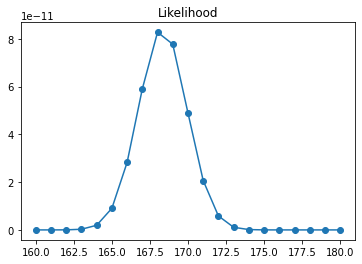

In [53]:
# draw plot
plt.plot(means, lhs, '-o')
plt.title('Likelihood')
plt.show()

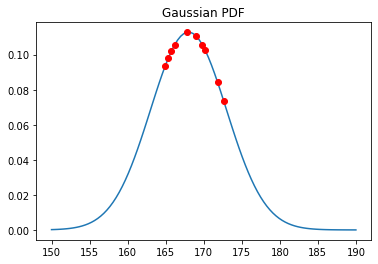

In [21]:
# gaussian PDF
y = gaussian_pdf(x, mean=168, std=5)
lh = gaussian_pdf(heights, mean=168, std=5)

# draw plot
plt.plot(x, y)
plt.plot(heights, lh, "ro")
plt.title('Gaussian PDF')
plt.show()

In [22]:
# 평균값별로 log likelihood 계산
lls = []
for mean in means:
    lh = gaussian_pdf(heights, mean=mean, std=5)
    ll = np.log(lh)
    ll = np.sum(ll)
    lls.append(ll)
lls = np.array(lls)
max_idx = np.argmax(lls)

print(max_idx, means[max_idx], lls[max_idx])
print(lls)

8 168 -23.215348553588004
[-37.11614855 -33.97854855 -31.24094855 -28.90334855 -26.96574855
 -25.42814855 -24.29054855 -23.55294855 -23.21534855 -23.27774855
 -23.74014855 -24.60254855 -25.86494855 -27.52734855 -29.58974855
 -32.05214855 -34.91454855 -38.17694855 -41.83934855 -45.90174855
 -50.36414855]


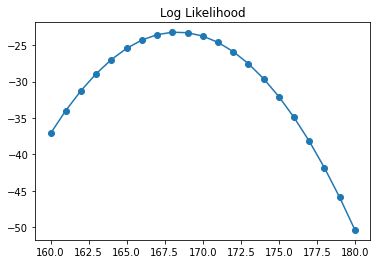

In [23]:
# draw plot
plt.plot(means, lls, '-o')
plt.title('Log Likelihood')
plt.show()

In [25]:
# 평균값별로 negative log likelihood 계산
nlls = -(lls)
min_idx = np.argmin(nlls)

print(min_idx, means[min_idx], nlls[min_idx])
print(nlls)

8 168 23.215348553588004
[37.11614855 33.97854855 31.24094855 28.90334855 26.96574855 25.42814855
 24.29054855 23.55294855 23.21534855 23.27774855 23.74014855 24.60254855
 25.86494855 27.52734855 29.58974855 32.05214855 34.91454855 38.17694855
 41.83934855 45.90174855 50.36414855]


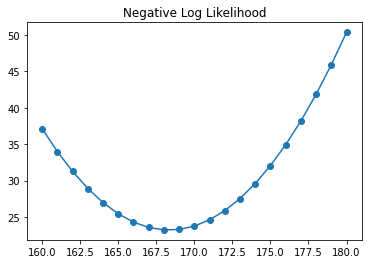

In [26]:
# draw plot
plt.plot(means, nlls, '-o')
plt.title('Negative Log Likelihood')
plt.show()

# Example

In [40]:
# Generate linearly spaced vector
p = np.linspace(0, 1, 102)[1:-1]
print(p)

[0.00990099 0.01980198 0.02970297 0.03960396 0.04950495 0.05940594
 0.06930693 0.07920792 0.08910891 0.0990099  0.10891089 0.11881188
 0.12871287 0.13861386 0.14851485 0.15841584 0.16831683 0.17821782
 0.18811881 0.1980198  0.20792079 0.21782178 0.22772277 0.23762376
 0.24752475 0.25742574 0.26732673 0.27722772 0.28712871 0.2970297
 0.30693069 0.31683168 0.32673267 0.33663366 0.34653465 0.35643564
 0.36633663 0.37623762 0.38613861 0.3960396  0.40594059 0.41584158
 0.42574257 0.43564356 0.44554455 0.45544554 0.46534653 0.47524752
 0.48514851 0.4950495  0.5049505  0.51485149 0.52475248 0.53465347
 0.54455446 0.55445545 0.56435644 0.57425743 0.58415842 0.59405941
 0.6039604  0.61386139 0.62376238 0.63366337 0.64356436 0.65346535
 0.66336634 0.67326733 0.68316832 0.69306931 0.7029703  0.71287129
 0.72277228 0.73267327 0.74257426 0.75247525 0.76237624 0.77227723
 0.78217822 0.79207921 0.8019802  0.81188119 0.82178218 0.83168317
 0.84158416 0.85148515 0.86138614 0.87128713 0.88118812 0.89108

$\mathcal{L}(p) = p^7(1-p)^3$

In [30]:
# likelihood
lh = np.power(p, 7) * np.power(1 - p, 3)

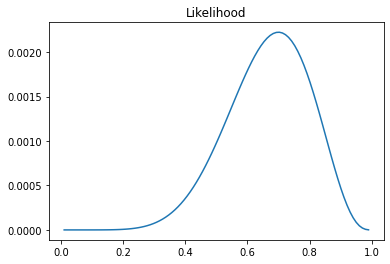

In [31]:
# draw plot
plt.plot(p, lh)
plt.title('Likelihood')
plt.show()

$\log \mathcal{L}(p) = 7 \log p + 3 \log (1-p)$

In [32]:
# log likelihood
ll = 7 * np.log(p) + 3 * np.log(1 - p)

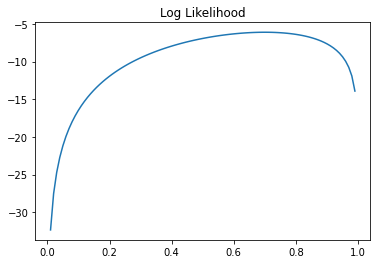

In [34]:
# draw plot
plt.plot(p, ll)
plt.title('Log Likelihood')
plt.show()

$-\log \mathcal{L}(p) = - 7 \log p - 3 \log (1-p)$

In [35]:
# negative log likelihood
nll = - 7 * np.log(p) - 3 * np.log(1 - p)

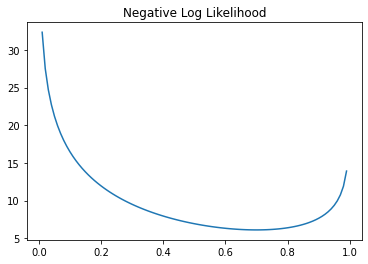

In [36]:
# draw plot
plt.plot(p, nll)
plt.title('Negative Log Likelihood')
plt.show()

$- {\log \mathcal{L}(p) \over dp} = - 7 {1 \over p} + 3 {1 \over 1 -p}$

In [37]:
# negative log likelihood gradient
gradient = - 7 / p + 3 / (1 - p)

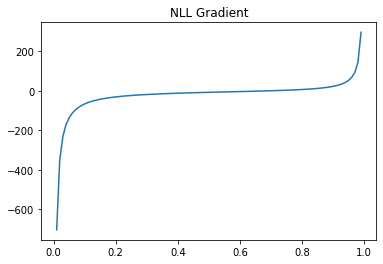

In [38]:
# draw plot
plt.plot(p, gradient)
plt.title('NLL Gradient')
plt.show()